In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model

In [2]:
nabil_read =pd.read_csv('Nabil.csv')
nabil=pd.DataFrame(nabil_read)

In [3]:
# nabil.drop('S.N.',
#   axis='columns', inplace=True)
nabil=nabil.reindex(index=nabil.index[::-1])

In [4]:
nabil.index = pd.RangeIndex(start=0, stop=2242, step=1)
nabil.head(1792)

,S.N.,Date,Total Transactions,Total Traded Shares,Total Traded Amount,Max Price,Min. Price,Close Price
0,2242,1/1/2012,11,799,684720.0,879.0,851.0,879.0
1,2241,1/2/2012,14,1002,897160.0,913.0,882.0,900.0
2,2240,1/3/2012,26,2653,2396445.0,916.0,892.0,892.0
3,2239,1/4/2012,9,490,417289.0,875.0,842.0,865.0
4,2238,1/5/2012,2,121,104175.0,875.0,858.0,858.0
...,...,...,...,...,...,...,...,...
1787,455,10/3/2019,43,5226,4032416.0,778.0,769.0,769.0
1788,454,10/10/2019,15,728,560034.0,773.0,765.0,770.0
1789,453,10/14/2019,72,16518,12628679.0,770.0,757.0,765.0
1790,452,10/15/2019,38,4973,3789781.0,765.0,760.0,763.0


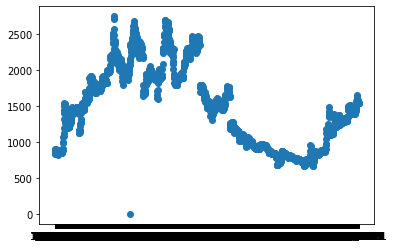

In [5]:
length=len(nabil)
plt.scatter(nabil["Date"],nabil["Close Price"])

In [6]:
training=int(0.8*length)
test=int(length-training)

In [7]:
print(training,test,length)

1793 449 2242


In [8]:
x=nabil.drop(["Date","Total Transactions","Total Traded Shares","Close Price"],axis=1)
y=nabil["Close Price"]

In [9]:
x_training_data=x[0:training-1]
y_training_data=y[0:training-1]
x_test_data=x[training:(training+test)-1]
y_test_data=y[training:(training+test)-1]
y_test_data.index = pd.RangeIndex(start=0, stop=448, step=1)
x_test_data.index = pd.RangeIndex(start=0, stop=448, step=1)
test_date=nabil["Date"][training:(training+test)-1]
test_date.index = pd.RangeIndex(start=0, stop=448, step=1)

In [10]:
x_training_data,y_training_data.shape,x_test_data.shape,y_test_data.shape

(      S.N.  Total Traded Amount  Max Price   Min. Price
 0     2242             684720.0       879.0       851.0
 1     2241             897160.0       913.0       882.0
 2     2240            2396445.0       916.0       892.0
 3     2239             417289.0       875.0       842.0
 4     2238             104175.0       875.0       858.0
 ...    ...                  ...         ...         ...
 1787   455            4032416.0       778.0       769.0
 1788   454             560034.0       773.0       765.0
 1789   453           12628679.0       770.0       757.0
 1790   452            3789781.0       765.0       760.0
 1791   451            3736305.0       768.0       754.0
 
 [1792 rows x 4 columns],
 (1792,),
 (448, 4),
 (448,))

In [11]:
stock=linear_model.LinearRegression()
stock_model=stock.fit(x_training_data,y_training_data)
stock_prediction=stock.predict(x_test_data)

In [12]:
stock_prediction[0:10]

array([761.34331195, 759.74047316, 757.73371048, 760.85166507,
       761.7048105 , 760.86451547, 756.13007727, 770.53372293,
       769.84576067, 769.33112647])

Text(0.5, 1.0, 'try')

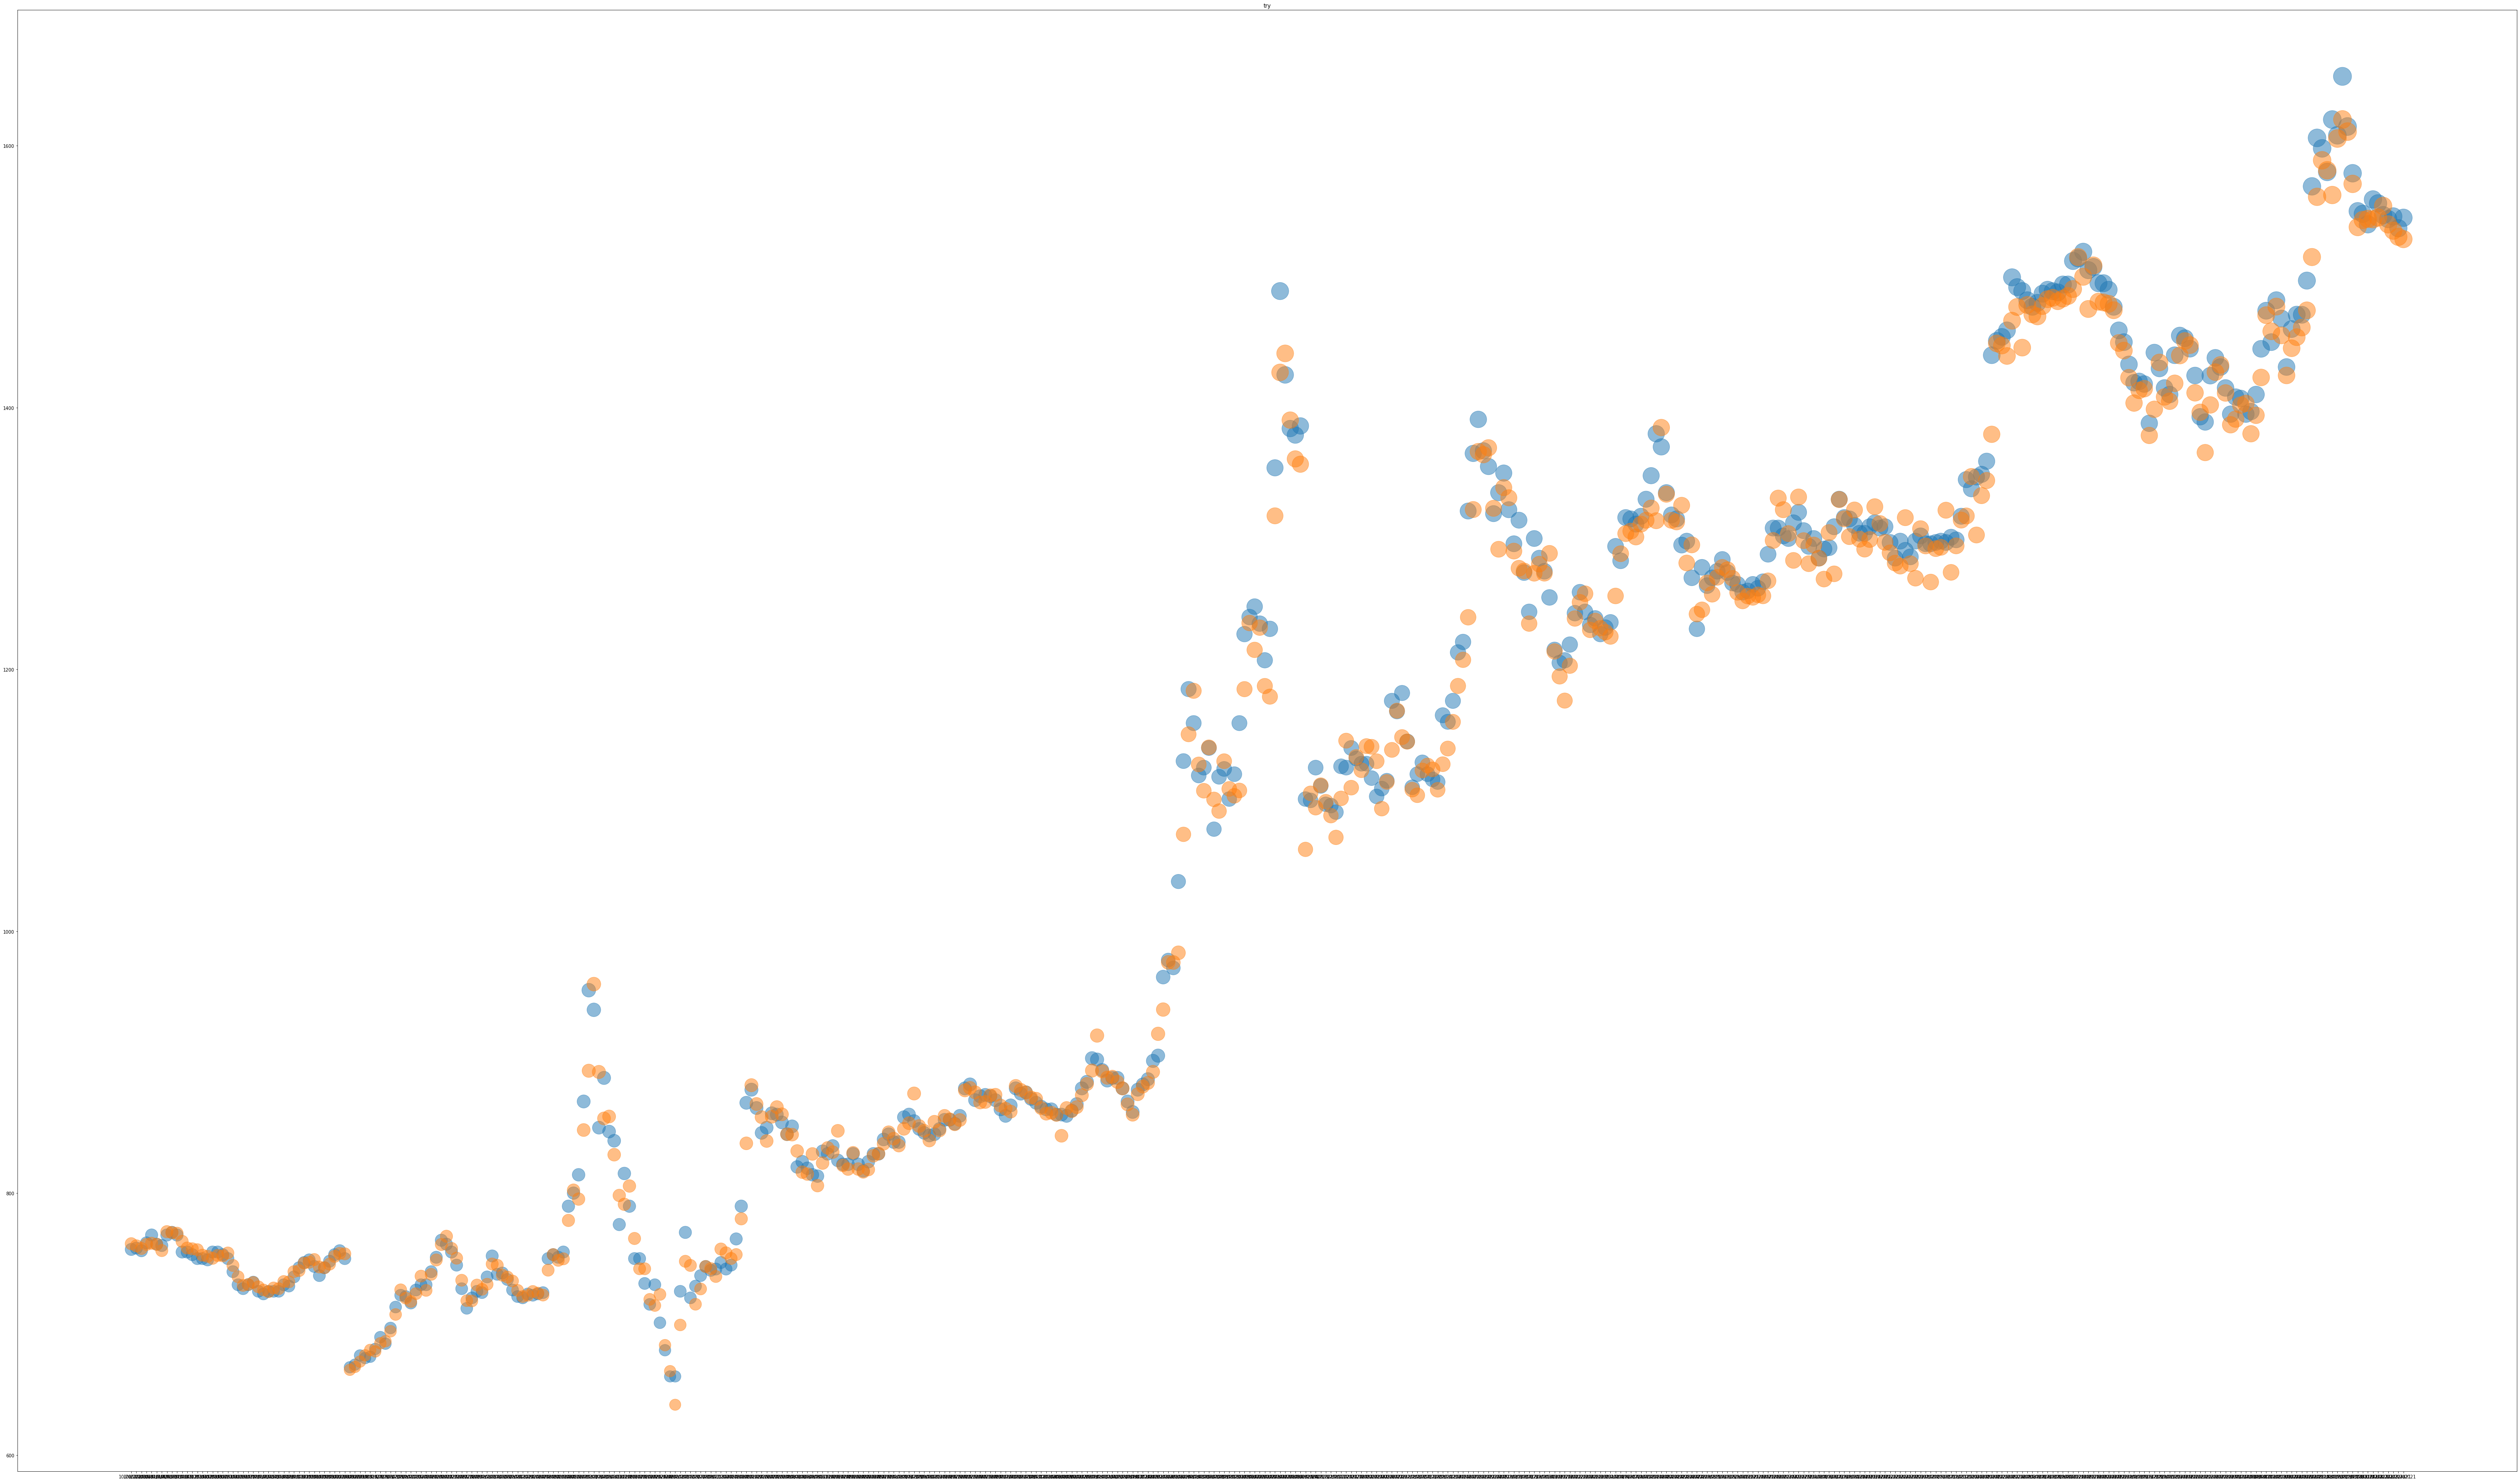

In [13]:
plt.figure(figsize=(100,60))
plt.scatter(test_date,y_test_data,alpha=0.5,s=y_test_data)
plt.scatter(test_date,stock_prediction,alpha=0.5,s=stock_prediction)
plt.title("try")

In [14]:
stock_prediction_df=pd.DataFrame(stock_prediction,columns = ['price'])
nabil.tail()

,S.N.,Date,Total Transactions,Total Traded Shares,Total Traded Amount,Max Price,Min. Price,Close Price
2237,5,11/21/2021,1112,75509,116771963.4,1565.0,1538.0,1544.0
2238,4,11/22/2021,1007,80745,124845767.5,1554.9,1540.0,1546.0
2239,3,11/23/2021,964,62286,95971223.5,1550.0,1532.0,1537.0
2240,2,11/24/2021,808,54975,84660876.9,1550.0,1527.0,1545.0
2241,1,11/25/2021,961,64950,100167376.7,1550.0,1535.0,1538.0


In [15]:
stock_prediction_df["price"].head()

0    761.343312
1    759.740473
2    757.733710
3    760.851665
4    761.704811
Name: price, dtype: float64

In [16]:
error=abs(y_test_data-stock_prediction_df["price"])

In [17]:
total=len(error)

In [18]:
error_sum=error.sum()

In [19]:
mean=error_sum/total

In [20]:
print(mean)

11.124238234974131
